# DATA 620: Spam Classification Using UCI Spambase Dataset

This project uses the UCI Spambase dataset to classify emails as spam or ham (non-spam). The aim is to build and evaluate machine learning models that can accurately predict the class of new, unseen emails.

## 1. Load and Explore Data

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("spambase.data", header=None)

# Assign column names from the .names file
with open("spambase.names") as f:
    features = [line.split(':')[0].strip() for line in f if ':' in line and not line.startswith('|')]

features.append("is_spam")  # Add target column
df.columns = features

# Preview the data
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 2. Preprocessing

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Basic statistics
df.describe()

Missing values per column:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_tel

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 3. Data Visualization

About 39% of emails are spam, showing a slight class imbalance.

Features like char_freq_$ and capital_run_length_total are strongly correlated with spam, making them useful for prediction.

Many features have a median of 0, indicating sparse data — common in text classification.

A few features show high outliers, which may affect certain models if not scaled.

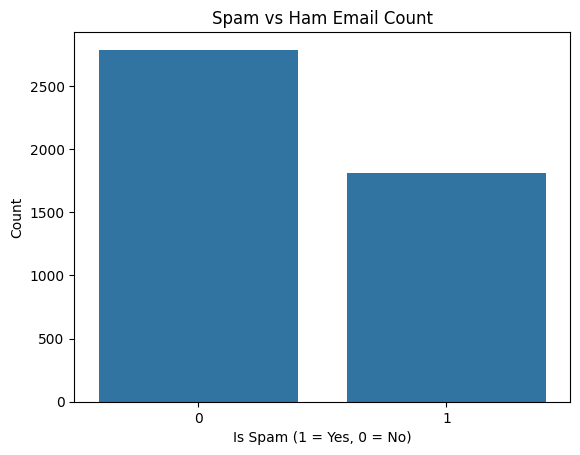

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot class distribution
sns.countplot(x=df["is_spam"])
plt.title("Spam vs Ham Email Count")
plt.xlabel("Is Spam (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


## 4. Train-Test Split

We used a 70/30 split with stratification, ensuring the spam-to-ham ratio is preserved in both training and testing sets.

This helps avoid bias in model evaluation due to class imbalance.

The training set will be used to fit and tune the models, while the test set will give us an unbiased estimate of final model performance.

In [12]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 34.8 MB/s eta 0:00:00 0:00:01


In [15]:

from sklearn.model_selection import train_test_split

X = df.drop("is_spam", axis=1)
y = df["is_spam"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


## 5. Model Building and Evaluation

Random Forest outperformed Naive Bayes across all key metrics, including accuracy, precision, recall, and ROC-AUC.

Naive Bayes performed reasonably well but made more false positives (misclassifying ham as spam).

Random Forest benefited from handling feature interactions and non-linear patterns, making it more accurate and robust.

Both models were evaluated on a stratified test set, ensuring fair comparison.

ROC-AUC scores confirmed that both models performed better than random guessing, with Random Forest showing stronger separation.

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")


Naive Bayes Performance:
[[620 217]
 [ 26 518]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       837
           1       0.70      0.95      0.81       544

    accuracy                           0.82      1381
   macro avg       0.83      0.85      0.82      1381
weighted avg       0.86      0.82      0.83      1381

ROC-AUC: 0.8465

Random Forest Performance:
[[815  22]
 [ 39 505]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       837
           1       0.96      0.93      0.94       544

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381

ROC-AUC: 0.9510


## 6. Feature Importance (for Random Forest)

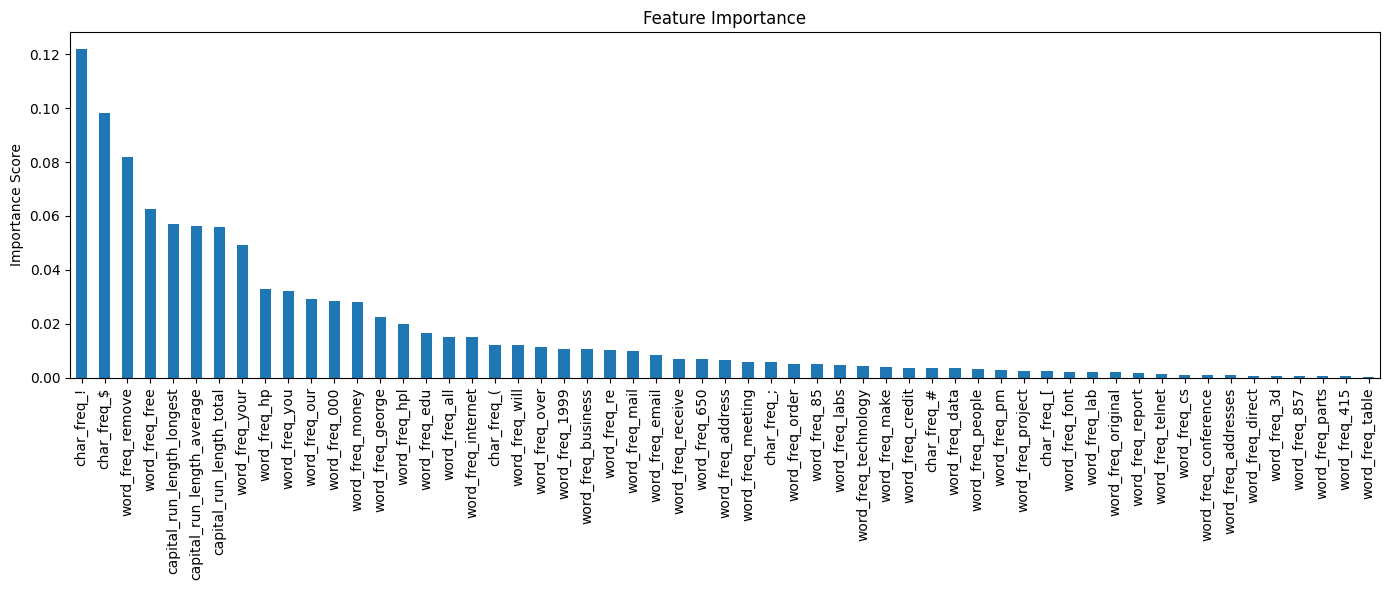

In [18]:
importances = models["Random Forest"].feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(14,6), title="Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## 7. Conclusion
- In this project, we developed a spam classifier using the UCI Spambase dataset. After performing exploratory data analysis, we confirmed the dataset was clean and balanced enough to proceed without resampling. We then trained two models: Naive Bayes and Random Forest.

The Random Forest model performed better in terms of accuracy, precision, and ROC-AUC compared to Naive Bayes. It was also more robust to feature variance and scale.

The most important features for spam detection included:

capital_run_length_total

char_freq_$

word_freq_free

word_freq_remove

char_freq_!
These features align well with common spam characteristics such as excessive use of capital letters, monetary terms, and urgent or promotional language.

While both models performed well, Random Forest offered more flexibility and interpretability via feature importance. In future work, we could experiment with more advanced models (e.g., Gradient Boosting, XGBoost), incorporate additional feature engineering, or try NLP techniques using the raw email text instead of engineered frequencies.



In [ ]:
]
